## Part1 (FlipFlop)

### Setup

In [1]:
%pylab inline
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
import re
import datetime as dt
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


In [2]:
import time

In [3]:
import seaborn as sns

In [4]:
def ht(df, n = 5):
    print(df.shape)
    if len(df) <= 2*n:
        display(df)
    else:
        display(df.head(n).append(df.tail(n)))

In [5]:
pd.set_option('display.max_columns', 100)
def pf(df):
    pd.set_option('display.max_rows', len(df))
    display(df)
    pd.reset_option('display.max_rows')

In [6]:
plt.style.use('seaborn')
# plt.rcParams['figure.figsize'] = [16, 9]

In [7]:
import six
import sys
sys.modules['sklearn.externals.six'] = six
import mlrose

In [8]:
random_seed = hash('jcha64') % (2 ** 32)

In [9]:
random_seed_list = [199, 197, 193, 191, 181, 179, 173, 167, 163, random_seed]

In [10]:
def RHC_HP(restarts, max_attempts, N, random_seed_list=[199, 197, 193, 191, 181, 179, 173, 167, 163, random_seed]):
    best_fitness_list = []
    wall_clock_time_list = []    
    for i in range(len(random_seed_list)):
        start = time.time()
        best_state, best_fitness, fitness_curve = mlrose.random_hill_climb(
            problem, 
            max_attempts=eval(max_attempts), 
            max_iters=5000, 
            restarts=eval(restarts), 
            init_state=init_state, 
            curve=True, 
            random_state=random_seed_list[i]
        )
        end = time.time()
        df = DataFrame(fitness_curve)
        df['iter'] = range(len(df))
        df['try'] = i
        df['hyper'] = f'restarts={restarts}, max_attempts={max_attempts}'
        df['RO'] = 'RHC'
        df['N'] = N
        df.columns = ['fitness', 'iter', 'try', 'hyper', 'RO', 'N']
        df_fitness_curve_list.append(df)
        best_fitness_list.append(best_fitness)
        wall_clock_time_list.append(end-start)
    return best_fitness_list, wall_clock_time_list

def SA_HP(init_temp, exp_const, max_attempts, N, random_seed_list=[199, 197, 193, 191, 181, 179, 173, 167, 163, random_seed]):
    best_fitness_list = []
    wall_clock_time_list = []    
    for i in range(len(random_seed_list)):
        start = time.time()
        best_state, best_fitness, fitness_curve = mlrose.simulated_annealing(
            problem, 
            schedule = mlrose.ExpDecay(init_temp = eval(init_temp), exp_const=eval(exp_const), min_temp=1e-10),
            max_attempts = eval(max_attempts), 
            max_iters = 5000,
            init_state = init_state, 
            random_state = random_seed_list[i], 
            curve = True
        )
        end = time.time()
        df = DataFrame(fitness_curve)
        df['iter'] = range(len(df))
        df['try'] = i
        df['hyper'] = f'T={init_temp},r={exp_const},max_attempts={max_attempts}'
        df['RO'] = 'SA'
        df['N'] = N
        df.columns = ['fitness', 'iter', 'try', 'hyper', 'RO', 'N']
        df_fitness_curve_list.append(df)
        best_fitness_list.append(best_fitness)
        wall_clock_time_list.append(end-start)
    return best_fitness_list, wall_clock_time_list

def GA_HP(pop_size, mut_prob, max_attempts, N, random_seed_list=[199, 197, 193, 191, 181, 179, 173, 167, 163, random_seed]):
    best_fitness_list = []
    wall_clock_time_list = []
    for i in range(len(random_seed_list)):
        start = time.time()
        best_state, best_fitness, fitness_curve = mlrose.genetic_alg(
            problem, 
            pop_size = eval(pop_size),
            mutation_prob=eval(mut_prob), 
            max_attempts=eval(max_attempts), 
            max_iters=5000, 
            random_state = random_seed_list[i], 
            curve = True
        )
        end = time.time()
        df = DataFrame(fitness_curve)
        df['iter'] = range(len(df))
        df['try'] = i
        df['hyper'] = f'pop_size={pop_size},mut_prob={mut_prob},max_attempts={max_attempts}'
        df['RO'] = 'GA'
        df['N'] = N
        df.columns = ['fitness', 'iter', 'try', 'hyper', 'RO', 'N']
        df_fitness_curve_list.append(df)
        best_fitness_list.append(best_fitness)
        wall_clock_time_list.append(end-start)
    return best_fitness_list, wall_clock_time_list        

def MIMIC_HP(pop_size, keep_pct, max_attempts, N, random_seed_list=[199, 197, 193, 191, 181, 179, 173, 167, 163, random_seed], fast_mimic=True):
    best_fitness_list = []
    wall_clock_time_list = []
    for i in range(len(random_seed_list)):
        start = time.time()
        best_state, best_fitness, fitness_curve = mlrose.mimic(
            problem, 
            pop_size=eval(pop_size), 
            keep_pct=eval(keep_pct), 
            max_attempts=eval(max_attempts), 
            max_iters=5000, 
            curve=True, 
            random_state=random_seed_list[i], 
            fast_mimic=fast_mimic
        )
        end = time.time()
        df = DataFrame(fitness_curve)
        df['iter'] = range(len(df))
        df['try'] = i
        df['hyper'] = f'pop_size={pop_size},keep_pct={keep_pct},max_attempts={max_attempts}'
        df['RO'] = 'MIMIC'
        df['N'] = N
        df.columns = ['fitness', 'iter', 'try', 'hyper', 'RO', 'N']
        df_fitness_curve_list.append(df)
        best_fitness_list.append(best_fitness)
        wall_clock_time_list.append(end-start)
    return best_fitness_list, wall_clock_time_list

### FlipFlop

#### Problem definition

In [11]:
N = 800

In [12]:
fitness = mlrose.FlipFlop()

In [13]:
np.random.seed(random_seed_list[-1])
init_state = np.random.randint(low = 0, high = 2, size = N)

In [14]:
fitness.evaluate(init_state)

402

In [15]:
problem = mlrose.DiscreteOpt(length = N, fitness_fn = fitness, maximize = True, max_val = 2)

#### RHC

In [16]:
df_fitness_curve_list = []

In [17]:
best_fitness_list, wall_clock_time_list = RHC_HP(restarts='0', max_attempts='10', N=N)
best_fitness = sum(best_fitness_list) / len(best_fitness_list)
print(best_fitness)
wall_clock_time = sum(wall_clock_time_list) / len(wall_clock_time_list)
print(wall_clock_time)

421.9
0.014924836158752442


In [18]:
best_fitness_list, wall_clock_time_list = RHC_HP(restarts='0', max_attempts='100', N=N)
best_fitness = sum(best_fitness_list) / len(best_fitness_list)
print(best_fitness)
wall_clock_time = sum(wall_clock_time_list) / len(wall_clock_time_list)
print(wall_clock_time)

631.1
0.4010506868362427


In [19]:
df_fitness_curve = pd.concat(df_fitness_curve_list)
ht(df_fitness_curve)

(13742, 6)


,fitness,iter,try,hyper,RO,N
0,404.0,0,0,"restarts=0, max_attempts=10",RHC,800
1,404.0,1,0,"restarts=0, max_attempts=10",RHC,800
2,404.0,2,0,"restarts=0, max_attempts=10",RHC,800
3,404.0,3,0,"restarts=0, max_attempts=10",RHC,800
4,406.0,4,0,"restarts=0, max_attempts=10",RHC,800
1542,646.0,1542,9,"restarts=0, max_attempts=100",RHC,800
1543,646.0,1543,9,"restarts=0, max_attempts=100",RHC,800
1544,646.0,1544,9,"restarts=0, max_attempts=100",RHC,800
1545,646.0,1545,9,"restarts=0, max_attempts=100",RHC,800
1546,646.0,1546,9,"restarts=0, max_attempts=100",RHC,800


Text(0.5, 1.0, 'FlipFlop RHC HP tuning')

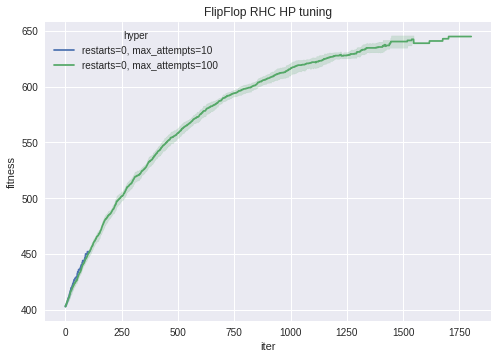

In [20]:
sns.lineplot(data=df_fitness_curve.reset_index(), x="iter", y="fitness", hue="hyper").set_title('FlipFlop RHC HP tuning')

#### SA

In [21]:
df_fitness_curve_list = []

In [22]:
# T=1e1,r=0.005,max_attempts=10
best_fitness_list, wall_clock_time_list = SA_HP(init_temp='1e1', exp_const='0.005', max_attempts='10', N=N)
best_fitness = sum(best_fitness_list) / len(best_fitness_list)
print(best_fitness)
wall_clock_time = sum(wall_clock_time_list) / len(wall_clock_time_list)
print(wall_clock_time)

/home/ceres-v2/miniconda3/envs/AI/lib/python3.9/site-packages/mlrose/algorithms.py:311: RuntimeWarning: overflow encountered in exp
  prob = np.exp(delta_e/temp)


629.8
0.6880817890167237


In [23]:
# T=1e1,r=0.005,max_attempts=10
best_fitness_list, wall_clock_time_list = SA_HP(init_temp='1e2', exp_const='0.005', max_attempts='10', N=N)
best_fitness = sum(best_fitness_list) / len(best_fitness_list)
print(best_fitness)
wall_clock_time = sum(wall_clock_time_list) / len(wall_clock_time_list)
print(wall_clock_time)

610.9
0.8636469125747681


In [24]:
# T=1e1,r=0.005,max_attempts=10
best_fitness_list, wall_clock_time_list = SA_HP(init_temp='1e2', exp_const='0.05', max_attempts='10', N=N)
best_fitness = sum(best_fitness_list) / len(best_fitness_list)
print(best_fitness)
wall_clock_time = sum(wall_clock_time_list) / len(wall_clock_time_list)
print(wall_clock_time)

636.6
0.5873090028762817


In [25]:
# T=1e1,r=0.005,max_attempts=10
best_fitness_list, wall_clock_time_list = SA_HP(init_temp='1e5', exp_const='0.005', max_attempts='10', N=N)
best_fitness = sum(best_fitness_list) / len(best_fitness_list)
print(best_fitness)
wall_clock_time = sum(wall_clock_time_list) / len(wall_clock_time_list)
print(wall_clock_time)

607.0
1.5895208597183228


In [26]:
# T=1e1,r=0.005,max_attempts=10
best_fitness_list, wall_clock_time_list = SA_HP(init_temp='1e2', exp_const='0.001', max_attempts='10', N=N)
best_fitness = sum(best_fitness_list) / len(best_fitness_list)
print(best_fitness)
wall_clock_time = sum(wall_clock_time_list) / len(wall_clock_time_list)
print(wall_clock_time)

577.3
2.561972904205322


In [27]:
df_fitness_curve = pd.concat(df_fitness_curve_list)
ht(df_fitness_curve)

(128804, 6)


,fitness,iter,try,hyper,RO,N
0,404.0,0,0,"T=1e1,r=0.005,max_attempts=10",SA,800
1,404.0,1,0,"T=1e1,r=0.005,max_attempts=10",SA,800
2,406.0,2,0,"T=1e1,r=0.005,max_attempts=10",SA,800
3,406.0,3,0,"T=1e1,r=0.005,max_attempts=10",SA,800
4,408.0,4,0,"T=1e1,r=0.005,max_attempts=10",SA,800
4995,571.0,4995,9,"T=1e2,r=0.001,max_attempts=10",SA,800
4996,569.0,4996,9,"T=1e2,r=0.001,max_attempts=10",SA,800
4997,569.0,4997,9,"T=1e2,r=0.001,max_attempts=10",SA,800
4998,569.0,4998,9,"T=1e2,r=0.001,max_attempts=10",SA,800
4999,569.0,4999,9,"T=1e2,r=0.001,max_attempts=10",SA,800


Text(0.5, 1.0, 'FlipFlop SA HP tuning')

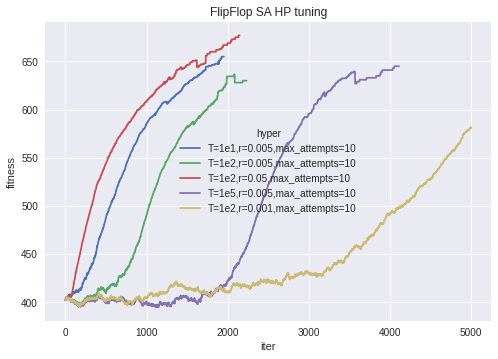

In [28]:
sns.lineplot(data=df_fitness_curve.reset_index(), x="iter", y="fitness", hue="hyper", ci=None).set_title('FlipFlop SA HP tuning')

#### MIMIC

In [29]:
df_fitness_curve_list = []

In [30]:
best_fitness_list, wall_clock_time_list = MIMIC_HP(pop_size='200', keep_pct='0.2', max_attempts='10', N=N, random_seed_list=[random_seed])
best_fitness = sum(best_fitness_list) / len(best_fitness_list)
print(best_fitness)
wall_clock_time = sum(wall_clock_time_list) / len(wall_clock_time_list)
print(wall_clock_time)

694.0
73.67190146446228


In [31]:
best_fitness_list, wall_clock_time_list = MIMIC_HP(pop_size='200', keep_pct='0.3', max_attempts='10', N=N, random_seed_list=[random_seed])
best_fitness = sum(best_fitness_list) / len(best_fitness_list)
print(best_fitness)
wall_clock_time = sum(wall_clock_time_list) / len(wall_clock_time_list)
print(wall_clock_time)

688.0
92.55895972251892


In [32]:
best_fitness_list, wall_clock_time_list = MIMIC_HP(pop_size='200', keep_pct='0.4', max_attempts='10', N=N, random_seed_list=[random_seed])
best_fitness = sum(best_fitness_list) / len(best_fitness_list)
print(best_fitness)
wall_clock_time = sum(wall_clock_time_list) / len(wall_clock_time_list)
print(wall_clock_time)

689.0
157.36524486541748


In [33]:
best_fitness_list, wall_clock_time_list = MIMIC_HP(pop_size='100', keep_pct='0.3', max_attempts='10', N=N, random_seed_list=[random_seed])
best_fitness = sum(best_fitness_list) / len(best_fitness_list)
print(best_fitness)
wall_clock_time = sum(wall_clock_time_list) / len(wall_clock_time_list)
print(wall_clock_time)

635.0
41.37972378730774


In [34]:
best_fitness_list, wall_clock_time_list = MIMIC_HP(pop_size='400', keep_pct='0.3', max_attempts='10', N=N, random_seed_list=[random_seed])
best_fitness = sum(best_fitness_list) / len(best_fitness_list)
print(best_fitness)
wall_clock_time = sum(wall_clock_time_list) / len(wall_clock_time_list)
print(wall_clock_time)

712.0
210.6544156074524


In [35]:
df_fitness_curve = pd.concat(df_fitness_curve_list)
ht(df_fitness_curve)

(316, 6)


,fitness,iter,try,hyper,RO,N
0,441.0,0,0,"pop_size=200,keep_pct=0.2,max_attempts=10",MIMIC,800
1,441.0,1,0,"pop_size=200,keep_pct=0.2,max_attempts=10",MIMIC,800
2,447.0,2,0,"pop_size=200,keep_pct=0.2,max_attempts=10",MIMIC,800
3,447.0,3,0,"pop_size=200,keep_pct=0.2,max_attempts=10",MIMIC,800
4,460.0,4,0,"pop_size=200,keep_pct=0.2,max_attempts=10",MIMIC,800
72,712.0,72,0,"pop_size=400,keep_pct=0.3,max_attempts=10",MIMIC,800
73,712.0,73,0,"pop_size=400,keep_pct=0.3,max_attempts=10",MIMIC,800
74,712.0,74,0,"pop_size=400,keep_pct=0.3,max_attempts=10",MIMIC,800
75,712.0,75,0,"pop_size=400,keep_pct=0.3,max_attempts=10",MIMIC,800
76,712.0,76,0,"pop_size=400,keep_pct=0.3,max_attempts=10",MIMIC,800


Text(0.5, 1.0, 'FlipFlop MIMIC HP tuning')

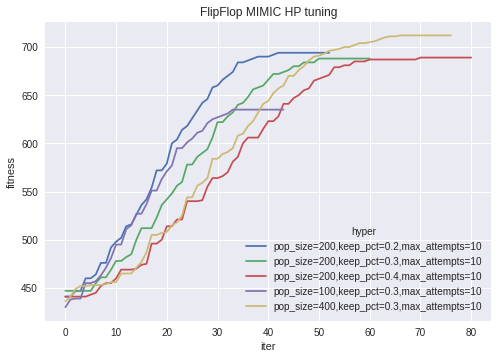

In [36]:
sns.lineplot(data=df_fitness_curve.reset_index(), x="iter", y="fitness", hue="hyper", ci=None).set_title('FlipFlop MIMIC HP tuning')

#### GA

In [37]:
df_fitness_curve_list = []

In [38]:
best_fitness_list, wall_clock_time_list = GA_HP(pop_size='200', mut_prob='0.1', max_attempts='10', N=N)
best_fitness = sum(best_fitness_list) / len(best_fitness_list)
print(best_fitness)
wall_clock_time = sum(wall_clock_time_list) / len(wall_clock_time_list)
print(wall_clock_time)

451.0
2.4775039672851564


In [39]:
best_fitness_list, wall_clock_time_list = GA_HP(pop_size='400', mut_prob='0.1', max_attempts='10', N=N)
best_fitness = sum(best_fitness_list) / len(best_fitness_list)
print(best_fitness)
wall_clock_time = sum(wall_clock_time_list) / len(wall_clock_time_list)
print(wall_clock_time)

452.9
3.902250385284424


In [40]:
best_fitness_list, wall_clock_time_list = GA_HP(pop_size='400', mut_prob='0.2', max_attempts='10', N=N)
best_fitness = sum(best_fitness_list) / len(best_fitness_list)
print(best_fitness)
wall_clock_time = sum(wall_clock_time_list) / len(wall_clock_time_list)
print(wall_clock_time)

454.2
5.635059666633606


In [41]:
best_fitness_list, wall_clock_time_list = GA_HP(pop_size='400', mut_prob='0.3', max_attempts='10', N=N)
best_fitness = sum(best_fitness_list) / len(best_fitness_list)
print(best_fitness)
wall_clock_time = sum(wall_clock_time_list) / len(wall_clock_time_list)
print(wall_clock_time)

452.1
6.085989761352539


In [42]:
df_fitness_curve = pd.concat(df_fitness_curve_list)
ht(df_fitness_curve)

(708, 6)


,fitness,iter,try,hyper,RO,N
0,434.0,0,0,"pop_size=200,mut_prob=0.1,max_attempts=10",GA,800
1,434.0,1,0,"pop_size=200,mut_prob=0.1,max_attempts=10",GA,800
2,434.0,2,0,"pop_size=200,mut_prob=0.1,max_attempts=10",GA,800
3,434.0,3,0,"pop_size=200,mut_prob=0.1,max_attempts=10",GA,800
4,435.0,4,0,"pop_size=200,mut_prob=0.1,max_attempts=10",GA,800
17,452.0,17,9,"pop_size=400,mut_prob=0.3,max_attempts=10",GA,800
18,452.0,18,9,"pop_size=400,mut_prob=0.3,max_attempts=10",GA,800
19,452.0,19,9,"pop_size=400,mut_prob=0.3,max_attempts=10",GA,800
20,452.0,20,9,"pop_size=400,mut_prob=0.3,max_attempts=10",GA,800
21,452.0,21,9,"pop_size=400,mut_prob=0.3,max_attempts=10",GA,800


Text(0.5, 1.0, 'FlipFlop GA HP tuning')

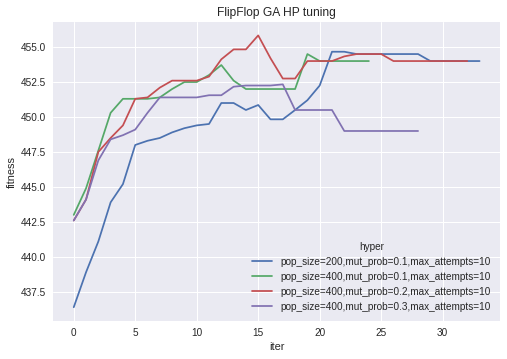

In [43]:
sns.lineplot(data=df_fitness_curve.reset_index(), x="iter", y="fitness", hue="hyper", ci=None).set_title('FlipFlop GA HP tuning')

#### Problem Size

In [44]:
df_fitness_curve_list = []
df_result_list = []

In [45]:
fitness = mlrose.FlipFlop()

In [46]:
for N in [200, 400, 600, 800]:
    print('N', N)
    np.random.seed(random_seed_list[-1])
    init_state = np.random.randint(low = 0, high = 2, size = N)
    problem = mlrose.DiscreteOpt(length = N, fitness_fn = fitness, maximize = True, max_val = 2)
    
    print('RHC')
    best_fitness_list, wall_clock_time_list = RHC_HP(restarts='0', max_attempts='10', N=N)
    best_fitness = sum(best_fitness_list) / len(best_fitness_list)
    print(best_fitness)
    wall_clock_time = sum(wall_clock_time_list) / len(wall_clock_time_list)
    print(wall_clock_time)    
    df_fitness_curve = pd.concat(df_fitness_curve_list)
    df_result_list.append(DataFrame({'RO': 'RHC', 'N': N, 'best_fitness': best_fitness, 'wall_clock_time': wall_clock_time, 'max_iter': df_fitness_curve[(df_fitness_curve['RO']=='RHC')&(df_fitness_curve['N']==N)].groupby('try')['iter'].max().mean()}, index=['N']))
    
    print('SA')
    best_fitness_list, wall_clock_time_list = SA_HP(init_temp='1e1', exp_const='0.005', max_attempts='10', N=N)
    best_fitness = sum(best_fitness_list) / len(best_fitness_list)
    print(best_fitness)
    wall_clock_time = sum(wall_clock_time_list) / len(wall_clock_time_list)
    print(wall_clock_time)
    df_fitness_curve = pd.concat(df_fitness_curve_list)
    df_result_list.append(DataFrame({'RO': 'SA', 'N': N, 'best_fitness': best_fitness, 'wall_clock_time': wall_clock_time, 'max_iter': df_fitness_curve[(df_fitness_curve['RO']=='SA')&(df_fitness_curve['N']==N)].groupby('try')['iter'].max().mean()}, index=['N']))
    
    print('GA')
    best_fitness_list, wall_clock_time_list = GA_HP(pop_size='400', mut_prob='0.2', max_attempts='10', N=N)
    best_fitness = sum(best_fitness_list) / len(best_fitness_list)
    print(best_fitness)
    wall_clock_time = sum(wall_clock_time_list) / len(wall_clock_time_list)
    print(wall_clock_time)
    df_fitness_curve = pd.concat(df_fitness_curve_list)
    df_result_list.append(DataFrame({'RO': 'GA', 'N': N, 'best_fitness': best_fitness, 'wall_clock_time': wall_clock_time, 'max_iter': df_fitness_curve[(df_fitness_curve['RO']=='GA')&(df_fitness_curve['N']==N)].groupby('try')['iter'].max().mean()}, index=['N']))
    
    print('MIMIC')
    best_fitness_list, wall_clock_time_list = MIMIC_HP(pop_size='400', keep_pct='0.3', max_attempts='10', N=N, random_seed_list=[random_seed])
    best_fitness = sum(best_fitness_list) / len(best_fitness_list)
    print(best_fitness)
    wall_clock_time = sum(wall_clock_time_list) / len(wall_clock_time_list)
    print(wall_clock_time)
    df_fitness_curve = pd.concat(df_fitness_curve_list)
    df_result_list.append(DataFrame({'RO': 'MIMIC', 'N': N, 'best_fitness': best_fitness, 'wall_clock_time': wall_clock_time, 'max_iter': df_fitness_curve[(df_fitness_curve['RO']=='MIMIC')&(df_fitness_curve['N']==N)].groupby('try')['iter'].max().mean()}, index=['N']))

N 200
RHC
114.9
0.002716946601867676
SA
161.7
0.10980477333068847
GA
126.3
1.8392793655395507
MIMIC
180.0
9.931608438491821
N 400
RHC
222.5
0.007168388366699219
SA
324.3
0.27025208473205564
GA
236.3
3.0523461580276487
MIMIC
359.0
45.76145815849304
N 600
RHC
327.0
0.012496209144592286
SA
464.4
0.41818962097167967
GA
346.1
4.344310760498047
MIMIC
535.0
145.10891699790955
N 800
RHC
421.9
0.014692234992980956
SA


/home/ceres-v2/miniconda3/envs/AI/lib/python3.9/site-packages/mlrose/algorithms.py:311: RuntimeWarning: overflow encountered in exp
  prob = np.exp(delta_e/temp)


629.8
0.6856448650360107
GA
454.2
5.602321362495422
MIMIC
712.0
214.78609085083008


Text(0.5, 1.0, 'FlipFlop 4 ROs N=800')

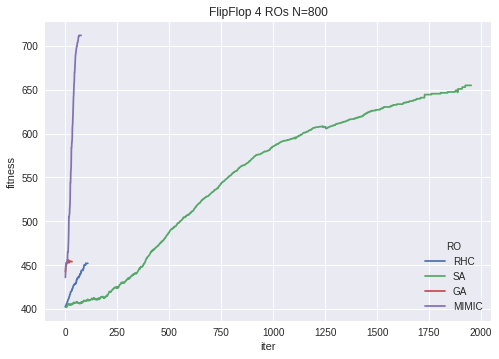

In [47]:
sns.lineplot(data=df_fitness_curve[df_fitness_curve['N']==800].reset_index(), x="iter", y="fitness", hue="RO", ci=None).set_title('FlipFlop 4 ROs N=800')

In [48]:
df_result = pd.concat(df_result_list)
df_result['best_fitness'] = 1 / df_result['best_fitness']

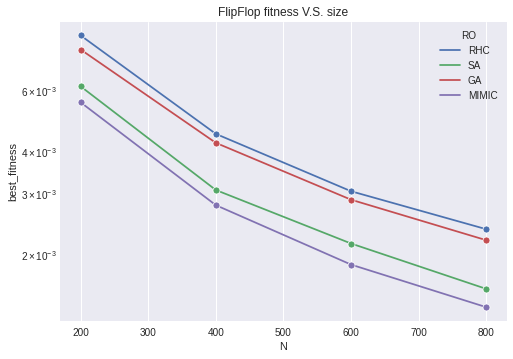

In [49]:
ax = sns.lineplot(data=df_result.reset_index(), x="N", y="best_fitness", hue="RO", marker='o')
ax.set(yscale='log')
ax.set_title('FlipFlop fitness V.S. size')
plt.show();

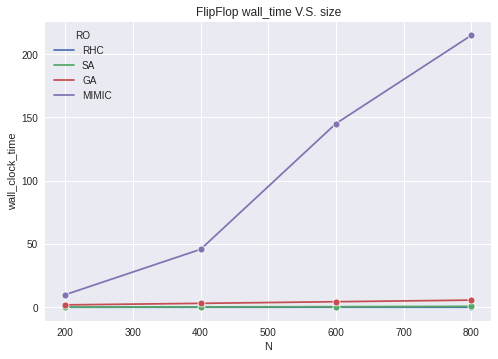

In [50]:
ax = sns.lineplot(data=df_result.reset_index(), x="N", y="wall_clock_time", hue="RO", marker='o')
# ax.set(yscale='log')
ax.set_title('FlipFlop wall_time V.S. size')
plt.show();

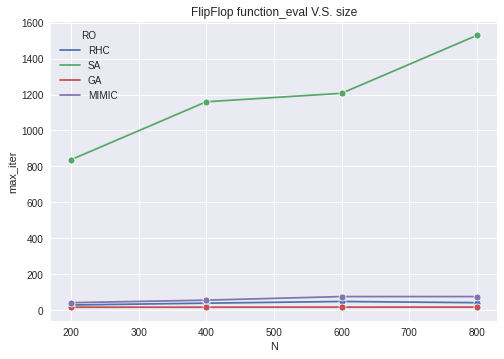

In [51]:
ax = sns.lineplot(data=df_result.reset_index(), x="N", y="max_iter", hue="RO", marker='o')
# ax.set(yscale='log')
ax.set_title('FlipFlop function_eval V.S. size')
plt.show();